# Differencing

In [21]:
import pandas as pd
import numpy as np
import statsmodels
import statsmodels.api
from statsmodels.stats.diagnostic import acorr_ljungbox
import matplotlib.pyplot as plt

In [5]:
goog200 = pd.read_csv('Data/goog200.csv')

Text(0.5, 1.0, 'Series: diff(goog200)')

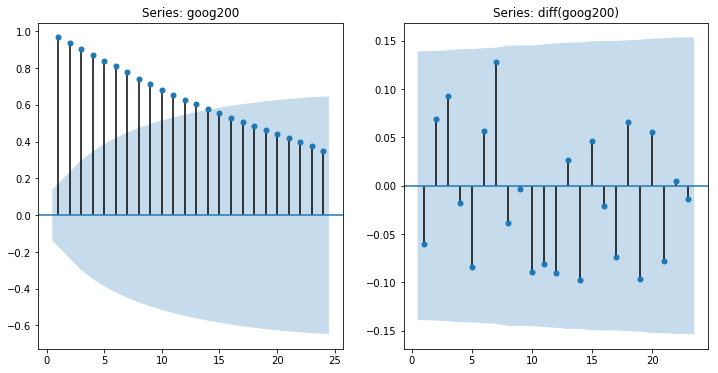

In [23]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
acf = statsmodels.graphics.tsaplots.plot_acf(goog200, zero=False, ax=ax1)
acf_diff = statsmodels.graphics.tsaplots.plot_acf(goog200.diff()[1:], zero=False, ax=ax2)
ax1.set_title('Series: goog200')
ax2.set_title('Series: diff(goog200)')


## Ljung-Box test

In [28]:
res = acorr_ljungbox(goog200.diff()[1:], lags=10)
print('Ljung-Box test statistic: ', res[0][-1])
print('Ljung-Box test p-value: ', res[1][-1])

Ljung-Box test statistic:  11.031435564867591
Ljung-Box test p-value:  0.3550741314470055


# Seasonal Differencing

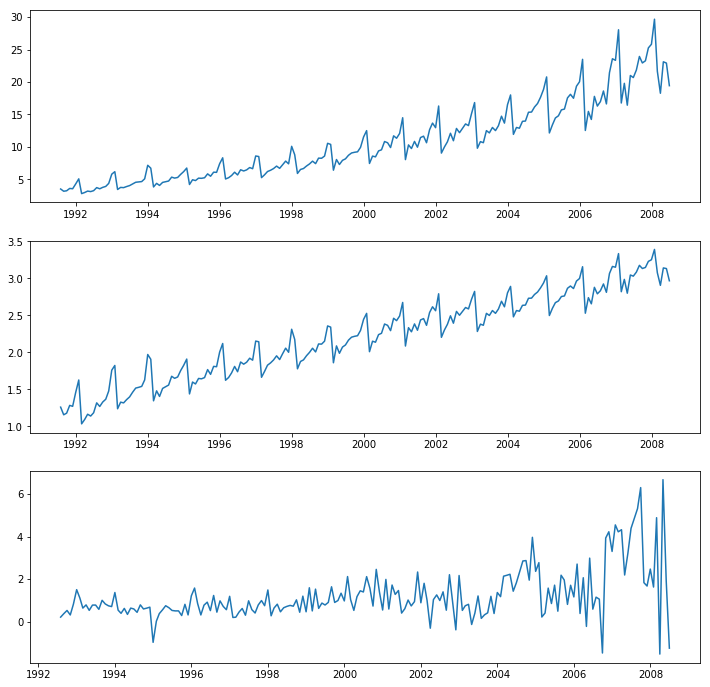

In [46]:
a10 = pd.read_csv('Data/a10.csv')
a10.index = pd.date_range(start='1991-07-31', end='2008-06-30', freq='M').to_pydatetime()

#Log transformation and seasonal differencing
a10_log = np.log(a10)
a10_diff = a10.diff(12)

fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(12,12))
ax1.plot(a10.index, a10.values)
ax2.plot(a10.index, a10_log.values)
ax3.plot(a10.index, a10_diff.values)